In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fuzzy_number_triangular(X, Mu, left, right):
    """
    Triangular fuzzy number
    
    Parameters:
    -----------
    X : array
        the input range, can be an array of floating points
    Mu : integer or float
        the mean of the fuzzy number
    left : integer or float
        left expansion of the fuzzy number
    right : integer or float
        right expansion of the fuzzy number
    """
    ## apply the left expansion on all the input
    ## then using np.where apply the right expansion to the data
    
    ## Apply the right expansion in the first condition
    ## and apply the left expansion in the left condition
    Y = np.where(X > Mu, (right - X) / (right - Mu) ,(X - left) / (Mu - left))
    ## zero the negative numbers
    Y = np.where(Y < 0, 0, Y)
    
    return Y

def fuzzy_number_trapezodial(x, outer_values, inner_values, highest_value):
    """
    Trapezodial fuzzy number
    
    Parameters:
    -----------
    x : array
        the input range, can be an array of floating points
    outer_values : tuple with length 2, contains integer or floats
        the tuple contains the left most and the right most values
        
        the parameters are as
        `left` : integer or float
            the left most value of the trapezodial which its y value is zero
        `right` : integer or float
            the right most value of the trapezodial which its y value is zero
    inner_values : tuple with length 2, contains integer or floats
        the tuple contains the left most and the right most values
        
        the parameters are as
        `left` : integer or float
            the inner left value of the trapezodial which its y value is the highest value
        `right` : integer or float
            the inner right value of the trapezodial which its y value is the highest value
    highest_value : integer or float
        the highest value that the trapezodial would go up
        
    Returns:
    ---------
    mu : float values
        the float values representing the fuzzy membership values
    """
    ## the slope that the value would start from zero
    first_slope = highest_value / (inner_values[0] - outer_values[0])
    second_slope = highest_value / (inner_values[1] - outer_values[1])
    
    ## initializing mu
    mu = np.zeros(len(x))
    
    mu = np.where((x >= outer_values[0]) & (x <= inner_values[0]), first_slope * (x - outer_values[0]), mu)
    
    ## applying the outer values to zero
    mu = np.where((x <= outer_values[0]) | (x >= outer_values[1]), 0, mu)
    ## applying the middle values to one
    mu = np.where((x > inner_values[0]) & (x <= inner_values[1]), highest_value, mu)
    
    mu = np.where((x > inner_values[1]) & (x < outer_values[1]), second_slope * (x - outer_values[1]), mu)
    
    return mu

def fuzzy_number_gaussian(X, Sigma, Mu):
    """
    The gaussian distribution
    
    Paremeters:
    ------------
    X : array_like
        the input range, can be an array of floating points
    Sigma : float
        the variance for gaussian distribution
    Mu : float
        the mean for gaussian distribution
        
    Returns:
    ---------
    Y : array_like
        same dimension as input `X`
        the values representing gaussian distribution
    """
    p1 = 1 / np.sqrt(2 * np.pi * (Sigma**2))
    p2 = np.exp(-np.power(X - Mu, 2) / (2*(Sigma**2)))

    Y = p1 * p2
    return Y

In [3]:
x_range = np.linspace(0, 3, 1000)

## the fuzzy values as outputs
## they can be different for each fuzzy value
## for the sake of simplicity we will assume the same fuzzy output values 
rule1_out = fuzzy_number_trapezodial(x_range,
                        outer_values=[0.5, 2], 
                        inner_values=[1, 1.5], 
                        highest_value = 1)

rule2_out = fuzzy_number_triangular(x_range + 2, 
                         Mu=3.2, 
                         left=2.5, 
                         right=3.7)

Rule1_Low = np.stack((x_range, rule1_out))
Rule1_Medium = np.stack((x_range + 1, rule1_out))
Rule1_High = np.stack((x_range + 2, rule1_out))

Rule2_Low = np.stack((x_range, rule2_out))
Rule2_Medium = np.stack((x_range + 1, rule2_out))
Rule2_High = np.stack((x_range + 2.1, rule2_out))

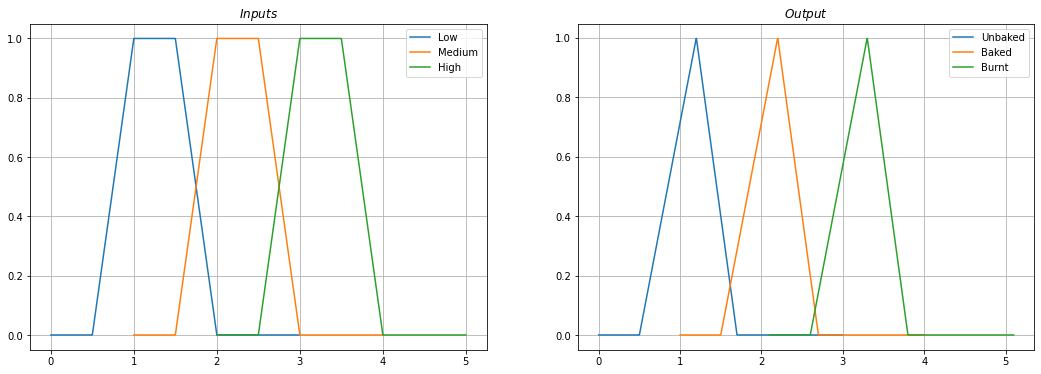

In [4]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(Rule1_Low[0], Rule1_Low[1], label='Low')
plt.plot(Rule1_Medium[0], Rule1_Medium[1], label='Medium')
plt.plot(Rule1_High[0], Rule1_High[1], label='High')
plt.grid()
plt.legend()

plt.title('$Inputs$')

plt.subplot(122)
plt.plot(Rule2_Low[0], Rule2_Low[1], label='Unbaked')
plt.plot(Rule2_Medium[0], Rule2_Medium[1], label='Baked')
plt.plot(Rule2_High[0], Rule2_High[1], label='Burnt')
plt.legend()
plt.grid()

plt.title('$Output$')

plt.show()



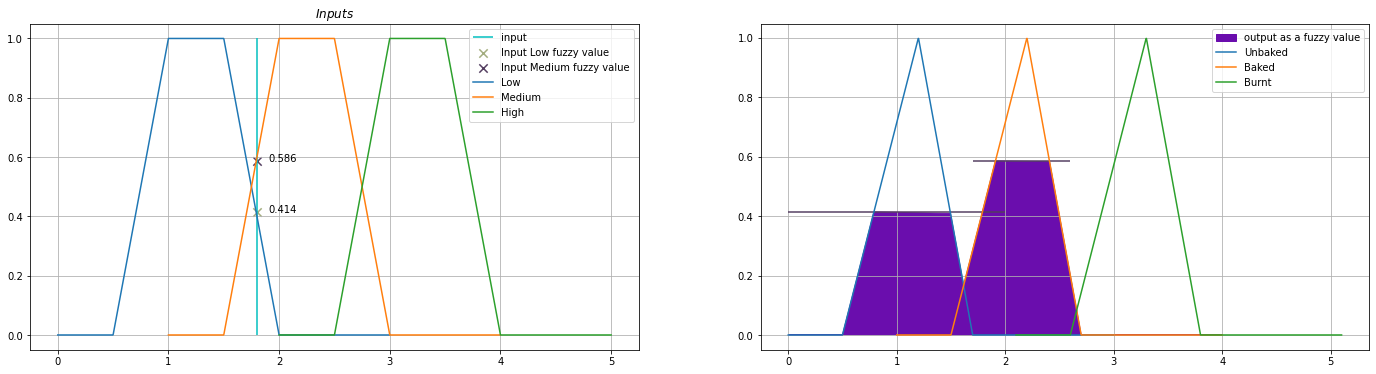

In [5]:
stove_heat = 1.8


fuzzyValueLow = Rule1_Low[1, np.isclose(stove_heat, Rule1_Low[0], atol=1e-2)][0]
fuzzyValueMedium = Rule1_Medium[1, np.isclose(stove_heat, Rule1_Medium[0], atol=1e-2)][0]

plt.figure(figsize=(24, 6))
plt.subplot(121)
## the input 
plt.vlines(stove_heat, 0, 1, colors='c', label='input')

## the fuzzy values for input
plt.scatter(stove_heat, fuzzyValueLow, marker='x', color='#A3AD7F', label='Input Low fuzzy value', s=70)
plt.scatter(stove_heat, fuzzyValueMedium, marker='x', color='#543E61', label='Input Medium fuzzy value', s=70)
plt.annotate(np.round(fuzzyValueLow, 3), (stove_heat + 0.1, fuzzyValueLow))
plt.annotate(np.round(fuzzyValueMedium, 3), (stove_heat + 0.1, fuzzyValueMedium))

## plotting the rules
plt.plot(Rule1_Low[0], Rule1_Low[1], label='Low')
plt.plot(Rule1_Medium[0], Rule1_Medium[1], label='Medium')
plt.plot(Rule1_High[0], Rule1_High[1], label='High')

plt.grid()
plt.legend()

plt.title('$Inputs$')


plt.subplot(122)

plt.hlines(fuzzyValueLow, 0, 2 , colors='#543E61')
plt.hlines(fuzzyValueMedium, 1.7, 2.6 , colors='#543E61')

plt.fill(Rule2_Low[0, Rule2_Low[1] <= fuzzyValueLow], Rule2_Low[1, Rule2_Low[1] <= fuzzyValueLow], color='#6a0dad', label='output as a fuzzy value')
plt.fill(Rule2_Medium[0, Rule2_Medium[1] <= fuzzyValueMedium], Rule2_Medium[1, Rule2_Medium[1] <= fuzzyValueMedium], color='#6a0dad')


## plotting the rules
plt.plot(Rule2_Low[0], Rule2_Low[1], label='Unbaked')
plt.plot(Rule2_Medium[0], Rule2_Medium[1], label='Baked')
plt.plot(Rule2_High[0], Rule2_High[1], label='Burnt')
plt.legend()
plt.grid()

plt.savefig('FuzzyCookingSystem.png')